In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import nltk
import sklearn


from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential




In [56]:
#defining some variables 

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [57]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


disaster=df_train[df_train['target']==1]
nodisaster=df_train[df_train['target']==0]
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [58]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

C:\Users\lrozebo1\AppData\Local\Temp\ipykernel_18956\3662210324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster['word_count'] = disaster['text'].apply(lambda x: len(str(x).split()))
C:\Users\lrozebo1\AppData\Local\Temp\ipykernel_18956\3662210324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodisaster['word_count'] = nodisaster['text'].apply(lambda x: len(str(x).split()))
C:\Users\lrozebo1\AppData\Local\Temp\ipykernel_18956\3662210324.py:6: SettingWithCopyWarning: 
A value is trying to be

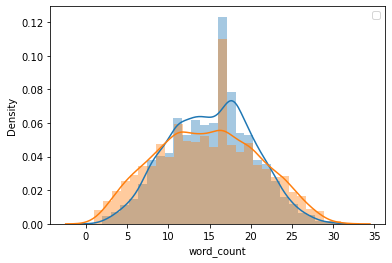

In [59]:
#plot number of words in text sequence

disaster['word_count'] = disaster['text'].apply(lambda x: len(str(x).split()))
nodisaster['word_count'] = nodisaster['text'].apply(lambda x: len(str(x).split()))

disaster['word_count'] = disaster['text'].apply(lambda x: len(str(x).split()))
nodisaster['word_count'] = nodisaster['text'].apply(lambda x: len(str(x).split()))


fig1,ax1=plt.subplots()
sns.distplot(disaster['word_count'])
sns.distplot(nodisaster['word_count'])
ax1.legend()

In [60]:
#train/validation split

xtrain, xval, ytrain, yval=train_test_split(df_train['text'],df_train['target'])


#remove stopwords from train set, this will make these words out of vocabulary
#create list of stopwords to remove

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

xtrain = [' '.join([y for y in x.split() if y not in stop_words]) for x in xtrain]
xtrain

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lrozebo1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['@malistkiss Sunnis continue believe righteous continually harm Shias. Defeats ideals Islam.',
 'Captain Abbott must go LNP boat #refugees #christianvalues https://t.co/Kp5dpOaF58',
 'There zero spider bite-related fatalities Australia since 1979.',
 "@mochichiiiii @hikagezero IT'S IMPOSSIBLE FOR ME TOO WW like can't survive day without meat wew",
 'Mane im Raiders Fan drought. They need go 10-6 lol',
 '@paddytomlinson1 ARMAGEDDON',
 '11-Year-Old Boy Charged With Manslaughter Toddler: Report: An 11-year-old boy charged manslaughter fatal sh...',
 '@HellFire_eV @JackPERU1 I one ????',
 '@Pam_Palmater agree @perrybellegarde get &amp; vote. Look devastation @pmharper caused #FirstNations #IdleNoMore #cndpoli #yyj',
 "Somebody get doctor I'm feelin' pretty poor. Somebody get stretcher I hit floor",
 'See happens NO Battle Block @CBSBigBrother!?! ???? finally',
 'FYI: ;ACCIDENT PROPERTY DAMAGE;3460 LIMESTONE LN;COL;YELLOWSTONE WAY;FIELDSTONE DR;08/05/2015 19:36:35',
 '@TheBlackshag @dannyo

In [61]:
#create tokenizer object and fit on text
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)


tokenizer.fit_on_texts(xtrain)
wordcounts=tokenizer.word_counts



#word count to dataframe
df=pd.DataFrame(wordcounts.values(),index=wordcounts.keys())

for i in stop_words:
    for j in df.index:
        if i == j:
            df.drop(i, inplace=True)

In [62]:
#df.plot()

In [63]:
#ceate sequences and pad sequences
train_seq=tokenizer.texts_to_sequences(xtrain)
train_padded=pad_sequences(train_seq,maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_seq=tokenizer.texts_to_sequences(xval)
val_padded=pad_sequences(val_seq,maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [64]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [66]:
num_epochs = 10
history = model.fit(train_padded, ytrain, epochs=num_epochs, validation_data=(val_padded, yval), verbose=2)

Epoch 1/10
179/179 - 1s - loss: 0.6812 - accuracy: 0.5688 - val_loss: 0.6744 - val_accuracy: 0.5751 - 596ms/epoch - 3ms/step
Epoch 2/10
179/179 - 0s - loss: 0.6649 - accuracy: 0.5703 - val_loss: 0.6453 - val_accuracy: 0.5798 - 219ms/epoch - 1ms/step
Epoch 3/10
179/179 - 0s - loss: 0.6151 - accuracy: 0.6595 - val_loss: 0.5912 - val_accuracy: 0.7348 - 223ms/epoch - 1ms/step
Epoch 4/10
179/179 - 0s - loss: 0.5296 - accuracy: 0.7805 - val_loss: 0.5220 - val_accuracy: 0.7805 - 232ms/epoch - 1ms/step
Epoch 5/10
179/179 - 0s - loss: 0.4356 - accuracy: 0.8334 - val_loss: 0.4760 - val_accuracy: 0.8125 - 231ms/epoch - 1ms/step
Epoch 6/10
179/179 - 0s - loss: 0.3621 - accuracy: 0.8706 - val_loss: 0.4577 - val_accuracy: 0.8109 - 232ms/epoch - 1ms/step
Epoch 7/10
179/179 - 0s - loss: 0.3121 - accuracy: 0.8900 - val_loss: 0.4567 - val_accuracy: 0.8114 - 219ms/epoch - 1ms/step
Epoch 8/10
179/179 - 0s - loss: 0.2753 - accuracy: 0.9031 - val_loss: 0.4578 - val_accuracy: 0.8067 - 233ms/epoch - 1ms/step


In [71]:
#now apply the moddel to predict wether a sentence is about a disaster
sentence=df_test['text']




sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



predictions=model.predict(padded)

In [87]:
df_test['prob_disaster']=predictions




df_test['target']=df_test['prob_disaster'].apply(lambda x: 1 if x>0.5 else 0)

df_output=df_test[['id','target']]

In [88]:
df_output.to_csv('output.csv',index=False)
